# NMIS Insights Online
## Cracking the Code: Python for Data Analytics
### Paul McHard, Andrew Hamilton, John Reilly 
### 7th October 2020


> "(Machine Learning is the) field of study that gives computers the ability to learn without being explicitly programmed."
> **Arthur Samuel, 1959**

### Importing Libraries and Setting up your Data

We'll start by importing our basic libraries. Think of these as:

- NumPy: For doing maths
- Pandas: For organising and accessing our dataset
- MatPlotLib: For Visualising data and creating Graphs
- SciPy: For scientific functions, here we need it for linear algebra

Note: We use `from` to import only the necessary modules from scipy, rather than the entire library.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

from scipy.signal import find_peaks
from scipy.stats import mode

Next, we use more specific import calls to utilise Machine Learning tools. In this session we're using SciKitLearn to provide Machine Learning functions for Regression and Classification. Alternatives include **PyTorch, TensorFlow, FastAI** and more.

Definitions:
- Regression: A Statistical Method for analysing the relationships between independent variables
- Classification (Machine Learning context): The task of an algorithm labelling data as being in 1 of n categories, based on its learned behaviour. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We'll now use pandas to read our data from CSV file and show that dataset

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('session-data.csv', parse_dates=['t'])
df = df.set_index('t')
df.head()

,x,y,z,classification,ax,ay,az,jx,jy,jz,j,jvar,jvar_mean
t,,,,,,,,,,,,,
2015-07-22 09:04:36.011718,872.0,-16732.0,-1248.0,2,0.048444,-0.929556,-0.069333,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-22 09:04:36.080684,860.0,-16856.0,-1176.0,2,0.047778,-0.936444,-0.065333,-0.000667,-0.006889,0.004000,0.007994,NaN,NaN
2015-07-22 09:04:36.149650,808.0,-16824.0,-1256.0,2,0.044889,-0.934667,-0.069778,-0.002889,0.001778,-0.004444,0.005591,NaN,NaN
2015-07-22 09:04:36.218616,776.0,-16748.0,-1256.0,2,0.043111,-0.930444,-0.069778,-0.001778,0.004222,0.000000,0.004581,NaN,NaN
2015-07-22 09:04:36.287582,876.0,-16788.0,-1172.0,2,0.048667,-0.932667,-0.065111,0.005556,-0.002222,0.004667,0.007588,NaN,NaN


## Aside: Why we use SciKitLearn
![frameworks](frameworks.png)
- Accessible for beginners
- Deploy simpler data analysis tasks with ease
- Rapid Development in earlier stages of complex tasks

### Visualising your Data and How to Prepare For Machine Learning

We will now use Matplotlib to visualise the dataset. While this may look like a lot of code, it is simply all for formatting the appearance of the graph, no processing of data occurs here. 

We'll introduce defining functions in python here, which can be exceptionally helpful for reducing duplicated effort in your code. 

Firstly, we set some formatting parameters here which will be called as variables throughout our program. This is circumstantial for the data being used. We set `start` and `end` as bounds for visualising our time series data, to look at only a half hour window in the data. 

In [10]:
# set plot parameterss
date_fmt = mdates.DateFormatter('%H:%M')
mpl.rcParams['figure.figsize'] = (12,5)
lf=10
tf=14
sf=10
#set time series window 
start = "2015-07-23 12:20:00"
end = "2015-07-23 12:50:00"

Then, since we'll be plotting data of a similar nature many times, we can set a lot of the groundwork for our graphs beforehand and call it as a function.

In [11]:
#Here we set the plotting code as a  generic function, which we can call later.
def plot_results(df, var, y_label, x_label, title, xmin, xlim, ymin, ylim):
    #plot the data
    p1 = plt.subplot(111)
    p1.plot(df[start:end].index, df[start:end][var], color='k')
    #Set labels for each axis and a title, we take these from our function call
    p1.set_ylabel(y_label, fontsize=lf)
    p1.set_xlabel(x_label, fontsize=lf)
    p1.set_title(title, fontsize=tf)
    #Axis Formatting - establish limits for our graphs
    p1.set_xlim([xmin,xlim])
    p1.set_yticks(np.arange(0, 0.025, step=0.005))
    p1.set_ylim([ymin, ylim])
    p1.tick_params(axis = 'both', which = 'major', labelsize = sf)
    p1.tick_params(axis='x', pad=10)
    p1.grid()
    
    for ax in [p1]:
         ax.xaxis.set_major_formatter(date_fmt)    
    plt.tight_layout()
    return p1

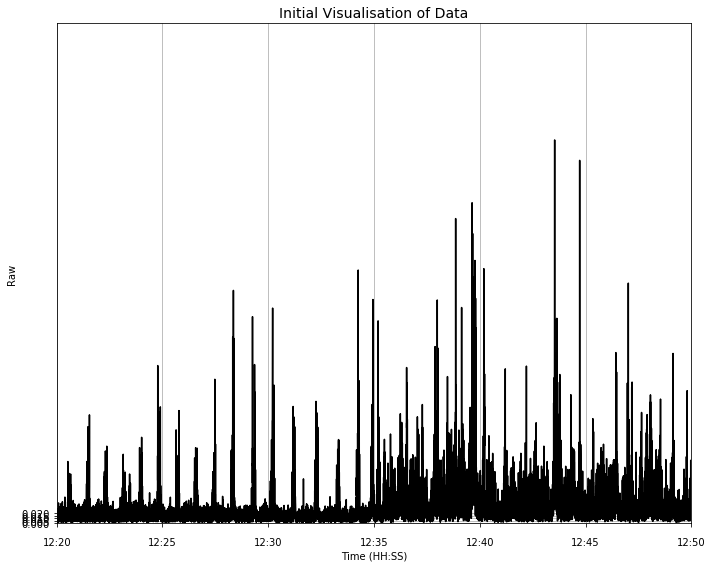

In [46]:
#Visualising Acellerometer Resolved Jerk Data 

#plot_results(df, var, y_label, x_label, title, ylim)
p1 = plot_results(df, 'j', 'Raw', 'Time (HH:SS)' ,'Initial Visualisation of Data',start, end, 0, 1)

We've now used our function to plot our initial, unfiltered jerk data, as it was recorded from the sensor.

Manufacturing acceleration data - pause to talk about data pre-processing. Understand signal and noise in the data, appropriate window to look at time series data when considering signal evolution over time. How long does a feature/anomaly manifest for in your data? Discuss importance of the quality of data for ML functions. Get out what you put in. Need for domain expertise in interrogating data.


Characterisitics of the dataset are periodicity and variance. Highly periodic and uniform variance. Second part is poorer periodicity, and variance is more volatile. Filter data based on this to highlight features

### The Iterative Process of Filtering Data

We'll now show how several stages of filtering will be applied to the data. This represents days if not weeks of work to identify what processing will need to be applied. This is not a panacea and requires skill in data analysis and domain expertise.

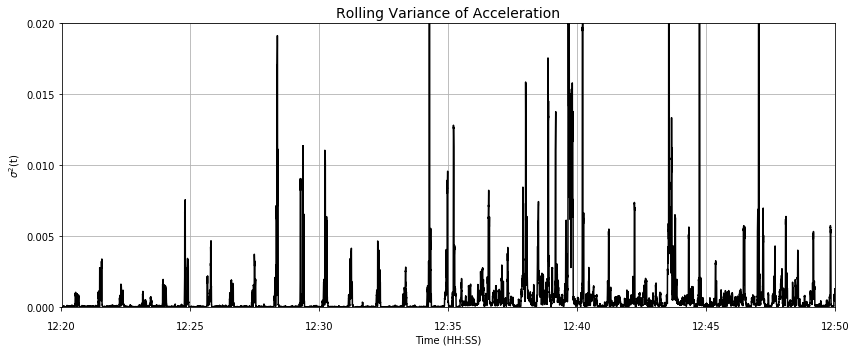

In [14]:
# evaluate jerk rolling variance with a 1.5 second window
w = 19 #window size
df['jvar'] = df['j'].rolling(w).var()
    
p1 = plot_results(df, 'jvar', '$σ^2$(t)',  'Time (HH:SS)', 'Rolling Variance of Acceleration', start, end, 0, 0.02)

Results of filtering have been sucessful - this stage can be HIGHLY itterative, effectively a binary classifier on variance. This can take weeks of work and requires domain expertise.


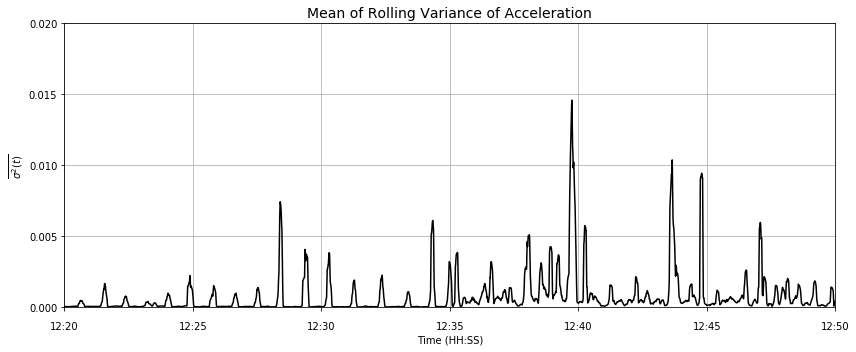

In [15]:
# evaluate rolling mean jerk variance with 8 second window
wprime = 100
df['jvar_mean'] = df['jvar'].rolling(wprime).mean()

#def plot_results(df, var, y_label, x_label, title, ylim):
p1 = plot_results(df, 'jvar_mean', '$\overline{\sigma^2(t)}$',  'Time (HH:SS)', 'Mean of Rolling Variance of Acceleration', start, end, 0,  0.02)

Second filtering to separate the peaks in the previous graph from the underlying signal - isolate the filtered data from the rest. Again part of the iterative data analysis stage. Preserving the relative distances for periodicity and variance targets.

## Feature 1 - Baseline Signal Energy

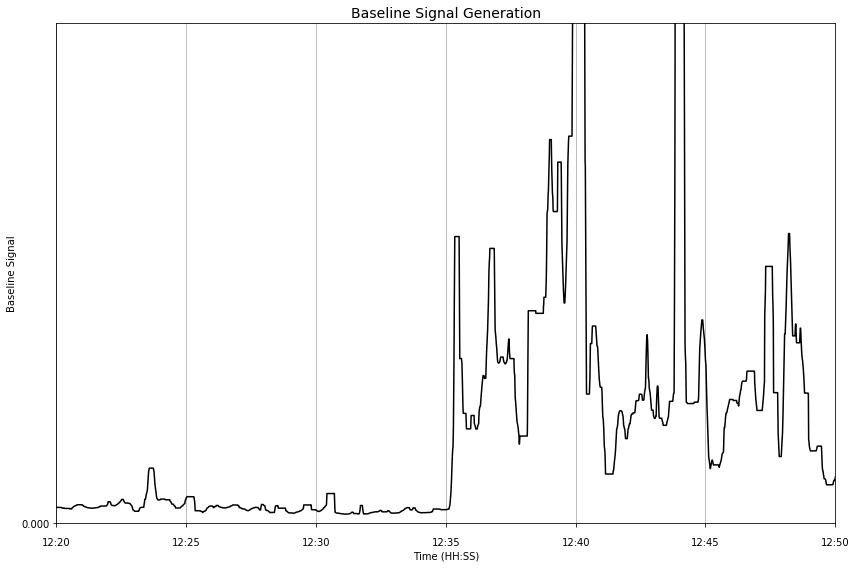

In [49]:
# evaluate jerk variance baseline energy
wprimeprime = 500 # 40 seconds
df['jvar_mean_baseline'] = df['jvar_mean'].rolling(wprimeprime).median()

mpl.rcParams['figure.figsize'] = (12,8)
p1 = plot_results(df,'jvar_mean_baseline', 'Baseline Signal', 'Time (HH:SS)', 'Baseline Signal Generation', start, end, 0, 0.002)

This is the final stage of our filtering, complete. When done in a deployment model, we would trim this down and not have the the visualisation at each stage, which would result in simply the application of each of the 3 rolling windows, which are filters on our signal.

## Feature 2 - Inter-peak Time 

When we move on to Machine Learning demonstration shortly, we'll be training the model using data about prominense and sensitivity of the data. To do that we need to find the peaks. Here we're starting to see the use of numpy, for numerical functions, pandas, for operations on our dataframe, and scipy, for peak finding in the data, all being used in collaboration. Using these libraries abstracts writing the maths for yourself, reducing complexity in the code, limiting the scope for human error and ensuring optimized functions.

In [17]:
# test the prominence sensitivity to select a single prominence value

min_peak_interval = 1 # when finding peaks, this sets the minimum distance between detecting peaks
npeaks=[]
start_prom = 0.00001
stop_prom =  0.00200
step_prom = 100

steps = np.linspace(start_prom, stop_prom, step_prom)
for n in steps:
    peaks, properties = find_peaks(df['jvar_mean'], prominence=(n), distance=min_peak_interval)
    npeaks.append(len(peaks))

xvals = (steps[0], steps[-1])
yvals = (npeaks[0], npeaks[-1])
m = (yvals[1]-yvals[0])/(xvals[1]-xvals[0])
c = yvals[1]-(m*xvals[1])
ylin = (steps*m)+c
ydiff = ylin-npeaks
maxydiff = max(ydiff)
maxyx = steps[np.where(ydiff == maxydiff)]


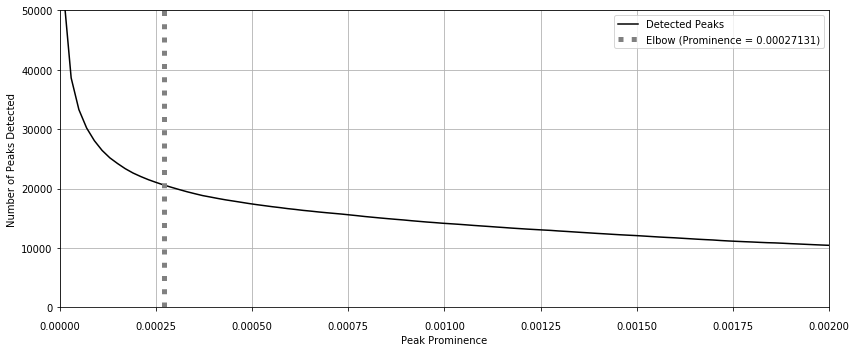

In [18]:
#We're plotting a different style of graph which uses different data, so we can't use our function here
mpl.rcParams['figure.figsize'] = (12,5)
p1 = plt.subplot(111)
p1.set_ylabel('Number of Peaks Detected', fontsize=lf)
p1.set_xlabel('Peak Prominence', fontsize=lf)
p1.plot(steps, npeaks, color='black')
p1.axvline(x=maxyx, linestyle = ':', linewidth = 5, color='gray')
p1.set_xlim([0,stop_prom])
p1.set_ylim([0,50000])
p1.tick_params(axis = 'both', which = 'major', labelsize = sf)
p1.tick_params(axis='x', pad=10)
p1.legend(['Detected Peaks','Elbow (Prominence = {:.5})'.format(float(maxyx))], fontsize=lf)
p1.grid()
plt.tight_layout()

Talk here about features we need for determining thresholds. Look for elbow points in graph to optimise - tradeoff in complexity and computation.

We have iteratively tested for peak detection in the data using the `for` loop in the code above. The 'elbow point' indicated, shows us the optimised point where we trade-off between complexity and computation 

In [19]:
# evaluate peak properties based on prominence sensitivity (prom value and mi_peak_interval (distance) value from above graph)
peaks, properties = find_peaks(df['jvar_mean'], prominence=float(maxyx), distance=1)
df_peaks = df.iloc[peaks] #iloc[] selects out just the specified data from our dataframe

# convert collar classification to rumination or eating/other (1, 0)
df_peaks.classification[df_peaks.classification==2]=0
df_peaks.classification = df_peaks.classification.astype(float)

# evaluate inter-contraction interval
ici = df_peaks.index.to_frame().t.diff().apply(lambda k: k.seconds)
df_peaks = df_peaks.assign(ici = ici)

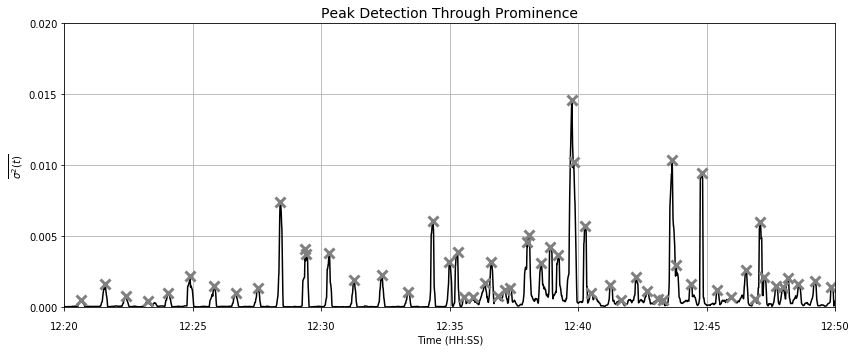

In [20]:
#plot_results(df, var, y_label, x_label, title, xmin, xlim, ymin, ylim, bool_date):
p1 = plot_results(df, 'jvar_mean', '$\overline{\sigma^2(t)}$', 'Time (HH:SS)', 'Peak Detection Through Prominence', start, end, 0, 0.02)
p1.plot(df_peaks[start:end].index, df_peaks[start:end]['jvar_mean'], "x", markersize=10, markeredgewidth=3, color='gray')

We now have 2 feature, but we need to assess the time of these features over a reasonable time period. If we assess over too short, we will not capture sufficient underlying data to based the filter ons, if we make the period too long, we risk misclassifying data periods later..

In [21]:
# aggregate data into blocks of time
freq_val = '270s'
agg = df_peaks.groupby(pd.Grouper(freq=freq_val)).agg(['mean',('majority_vote', lambda x: mode(x)[0])])

#script to plot aggregated time data
def plot_agg():
    mpl.rcParams['figure.figsize'] = (12,5)
    p1 = plt.subplot(111)
    p1.plot(agg[start:end].index, agg[start:end]['ici']['mean'], color='black')
    p1.set_ylabel('$\overline{IPT}$ (s)', fontsize=lf)
    p1.set_xlabel('Time (HH:SS)', fontsize=lf)
    p1.set_yticks(np.arange(0, 100, step=20))
    p1.set_ylim([0,90])
    p1.tick_params(axis = 'both', which = 'major', labelsize = sf)
    p1.tick_params(axis='x', pad=10)
    p1.grid()
    p1_yy = p1.twinx()
    p1_yy.plot(agg[start:end].index, agg[start:end]['ici']['mean'], color='black')
    p1_yy.plot(agg[start:end].index, agg[start:end]['jvar_mean_baseline']['mean'], linestyle = '--',color='gray')
    p1_yy.set_ylabel('$\overline{BSE}$', fontsize=lf)
    p1_yy.set_yticks(np.arange(0, 0.0012, step=0.0002))
    p1_yy.set_ylim([0,0.0015])
    p1_yy.tick_params(axis = 'both', which = 'major', labelsize = sf)
    p1_yy.legend(['$\overline{IPT}$','$\overline{BSE}$'], fontsize=lf)
    p1.set_xlim([start,end])

    for ax in [p1]:
        ax.xaxis.set_major_formatter(date_fmt)    
    plt.tight_layout()

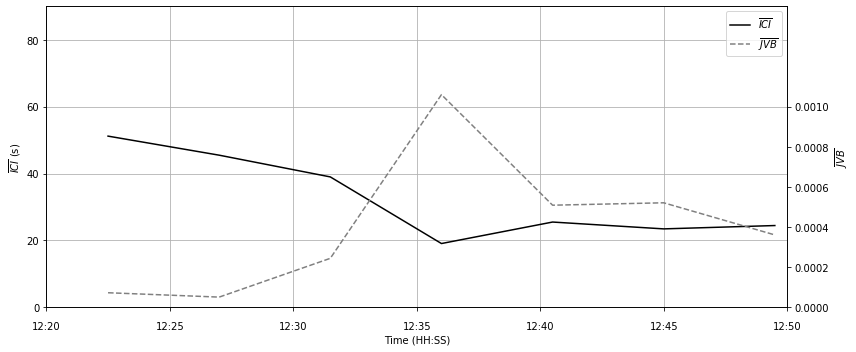

In [22]:
#separating code purely for visualisation in presentation
plot_agg()

In [40]:
#Create Scatter data using Numpy
ici_thres = 100
ici = agg.ici['mean'].values
jvb = np.log(agg.jvar_mean_baseline['mean'].values)  ## log the jvb values
state = pd.to_numeric(agg.classification['majority_vote'])
scat_data = np.column_stack((ici,jvb,state))
scat_data = scat_data[~np.isnan(scat_data).any(axis=1)] # drop nan's
scat_data = scat_data[scat_data[:,0] < ici_thres] # remove data above ici threshold 

def plot_scatter():
    mpl.rcParams['figure.figsize'] = (10,8)
    p1 = plt.subplot(111)
    xlims = [0,ici_thres]
    ylims = [-12,-2]
    s = 2
    p1.scatter(scat_data[:,0], scat_data[:,1], color='k', s=s)
    p1.set_xlim(xlims)
    p1.set_ylim(ylims)
    p1.set_title("$\overline{IPK}$ vs. $\overline{BSE}$ - 7.5 Days Dataset", fontsize=tf)
    p1.set_xlabel('$\overline{IPK}$ (s)', fontsize=lf)
    p1.set_ylabel('log($\overline{BSE}$)', fontsize=lf)
    p1.tick_params(axis = 'both', which = 'major', labelsize = sf)
    p1.grid()

    plt.tight_layout()

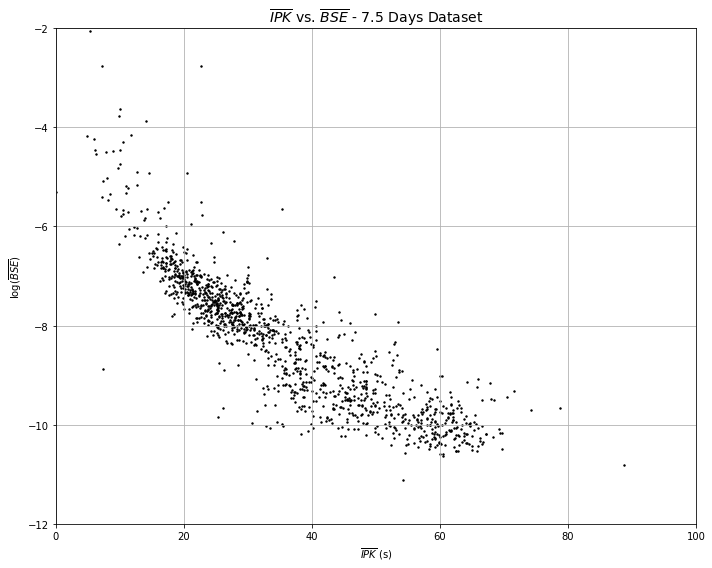

In [41]:
plot_scatter()

This is Scatter plot visualisation of our data.

In [34]:
# plot with true states from collar

def plot_true_scatter():
    mpl.rcParams['figure.figsize'] = (10,8)
    p1 = plt.subplot(111)
    xlims = [0,ici_thres]
    ylims = [-12,-2]
    s = 2

    p1.scatter(scat_data[:,0], scat_data[:,1], c=scat_data[:,2], cmap = 'bwr', s=s)
    p1.set_xlim(xlims)
    p1.set_ylim(ylims)
    p1.set_title("$\overline{BSE}$ vs. $\overline{IPK}$ - Binary Classifier", fontsize=tf)
    p1.set_xlabel('$\overline{IPK}$ (s)', fontsize=lf)
    p1.set_ylabel('log($\overline{BSE}$)', fontsize=lf)
    p1.tick_params(axis = 'both', which = 'major', labelsize = sf)
    p1.grid()

    plt.tight_layout()

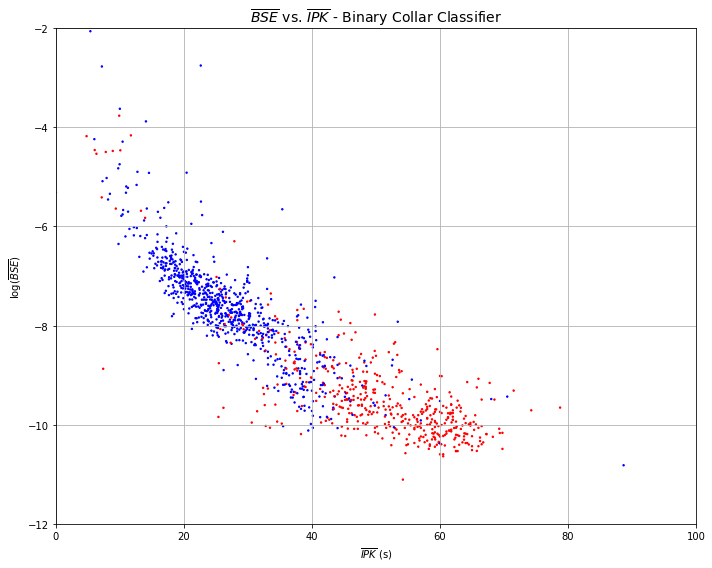

In [35]:
plot_true_scatter()

## Support Vector Machines 

We'll now move on to our final section of the webinar, which training and implementing a machine learning model on our data. From the last graph, we have two groups of data, which we've colourised and red and blue. We want our model to identify a boundary between this data, without being explicitly provided the differences between them. Especially helpful in this situation as there is a dispersal between blue and red data.

In [36]:
# split into training and test groups and also return X and Y values

def split_test_train(scat_data, test_size):
    X = scat_data[:,[0,1]]# split data set into attributes and labels
    y = scat_data[:,2].astype(np.integer) # convert the state (0,1) to integer for SVM
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify=y)
    return X_train, X_test, y_train, y_test, X, y

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    return TP, FP, TN, FN

X_train, X_test, y_train, y_test, X, y = split_test_train(scat_data, 0.2)

In [37]:
# classify data using training set
svclassifier = SVC(kernel='linear', degree=2, class_weight='balanced') # train algorithm (note degree is ignored by algorithms except 'poly')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test) # make predictions
score = svclassifier.score(X_test, y_test) # get score of classifier using remaining test data
class_report = classification_report(y_test,y_pred, output_dict=True) # extract f1 scores
f1 = class_report['weighted avg']['f1-score']

# get TP etc...

TP, FP, TN, FN = perf_measure(y_test, y_pred)

# get linear svm coeffs for plotting decision line

coeffs = svclassifier.coef_[0]
m = -coeffs[0]/coeffs[1]
c = -(svclassifier.intercept_[0])/coeffs[1]
xx = np.linspace(0, ici_thres)
yy = (m*xx)+c

In [38]:
def plot_svm():
    mpl.rcParams['figure.figsize'] = (10,8)
    pxy = np.column_stack((X,y))
    pp0 = pxy[pxy[:,2]==0]
    pp1 = pxy[pxy[:,2]==1]

    p1 = plt.subplot(111)
    xlims = [0,ici_thres]
    ylims = [-12,-2]
    s = 2
    p1.scatter(X[:,0], X[:,1], c=y, cmap = 'bwr', s=s)
    p1.plot(xx, yy, color='black', linestyle='--')
    p1.set_xlim(xlims)
    p1.set_ylim(ylims)
    p1.set_title("F1 Score: {:.3f}".format(0.861), fontsize=tf)
    p1.set_xlabel('$\overline{IPK}$ (s)', fontsize=lf)
    p1.set_ylabel('log($\overline{BSE}$)', fontsize=lf)
    p1.tick_params(axis = 'both', which = 'major', labelsize = sf)
    p1.grid()

    plt.tight_layout()

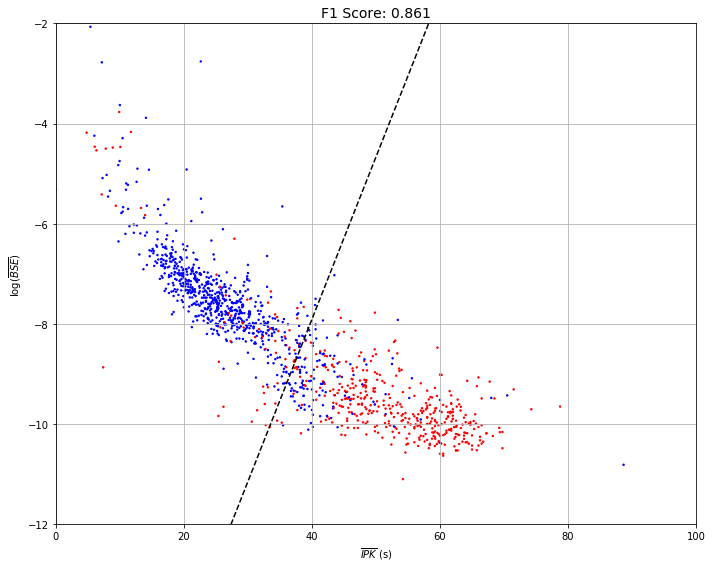

In [39]:
plot_svm()

At the end here we need to talk about what this result means. Why its valuable that this was achieved through ML, what it means for those attending and their data